   petrol_tax  average_income  paved_highways  population_driver_licence  \
0         9.0            3571            1976                      0.525   
1         9.0            4092            1250                      0.572   
2         9.0            3865            1586                      0.580   
3         7.5            4870            2351                      0.529   
4         8.0            4399             431                      0.544   

   petrol_consumption  
0                 541  
1                 524  
2                 561  
3                 414  
4                 410  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 5 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   petrol_tax                 48 non-null     float64
 1   average_income             48 non-null     int64  
 2   paved_highways             48 non-null     int64  
 3   population_d

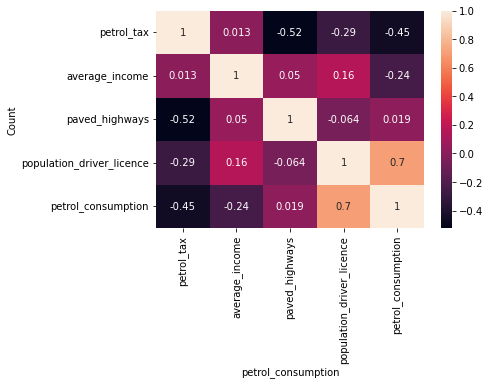

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
    
df = pd.read_csv("data/petrol_consumption.csv")

# Q1
print(df.head())
print(df.info())
print(df.describe())
print(df.corr())

# Q2
sns.heatmap(df.corr(), annot=True)
sns.histplot(df["petrol_consumption"])

# Q3
X_train, X_test, y_train, y_test= train_test_split(df.drop("petrol_consumption",axis=1), df["petrol_consumption"], test_size=0.3, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
plt.scatter(y_test, y_pred)

# Q4
print("MAE:", metrics.mean_absolute_error(y_test, y_pred))
print("MSE: ", metrics.mean_squared_error(y_test, y_pred))
print("RMSE: ", np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

In [7]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score as auc
from sklearn.linear_model import LinearRegression
from sklearn import metrics


df = pd.read_csv("data/turnover.csv")


# Q6. (15 points) Summarize the data set with descriptive statistics. 
# Print the count, average, min, max statistics, and column names in the data set.
# Use the “head(),” “describe(),” “info()” functions in the Pandas library.

print(df.head())
print(df.info())
print(df.describe())

# Q7. (20points) Deal with missing values to clean the data set by removing the observations 
# that have “etc” in the “industry” variable. 
# Use the “where” function in the Numpy library.

df['industry'].head()
df['industry'].unique()
np.where(df['industry']=='etc')
df.drop(df.index[np.where(df['industry']=='etc')], inplace=True)

# Q8. (20 points) Generate dummies of the categorical variable, i.e., the “industry” variable. 
# Use the “get_dummies” function in the Pandas library.
print(df['industry'].value_counts())

df = pd.get_dummies(data=df, columns=['industry'], dtype=float)
df.drop('industry_Retail', axis=1, inplace=True)
df.drop(['way'],axis=1, inplace=True)

# Q9. (20 points) Build a logistic regression model using the “sklearn.logistic_model” function.
df['gender'] = pd.get_dummies(data=df['gender'], drop_first=True)


X_train, X_test, y_train, y_test = train_test_split(df.drop('event',axis=1), 
                                                    df['event'], 
                                                    test_size=0.40, random_state=101)

logmodel = LogisticRegression()
logmodel.fit(X_train, y_train)
predictions = logmodel.predict(X_test)
probs = logmodel.predict_proba(X_test)


# Q10. (15 points) Show the accuracy and precision metrics on the predictions of the logistic regression model. 
# Use the “sklearn.metrics” function.

print("This model accuracy is {}%".format(round(logmodel.score(X_test, y_test)*100,2))) 
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test, predictions))


        stag  event gender   age         industry  way
0   7.030801      1      m  35.0            Banks  bus
1  22.965092      1      m  33.0            Banks  bus
2  15.934292      1      f  35.0  PowerGeneration  bus
3  15.934292      1      f  35.0  PowerGeneration  bus
4   8.410678      1      m  32.0           Retail  bus
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1129 entries, 0 to 1128
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   stag      1129 non-null   float64
 1   event     1129 non-null   int64  
 2   gender    1129 non-null   object 
 3   age       1129 non-null   float64
 4   industry  1129 non-null   object 
 5   way       1129 non-null   object 
dtypes: float64(2), int64(1), object(3)
memory usage: 53.0+ KB
None
              stag        event          age
count  1129.000000  1129.000000  1129.000000
mean     36.627526     0.505757    31.066965
std      34.096597     0.500188     6.996147
min 

/Users/unidev/opt/anaconda3/envs/ml-midterm/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
